In [1]:
import pofah.jet_sample as js
import pofah.util.sample_factory as sf
import pofah.util.experiment as ex
import selection.discriminator as dis
import selection.loss_strategy as ls
import analysis.analysis_discriminator as an
from importlib import reload

In [2]:
# read in qcd signal region sample
run_n = 101
qcd_sig_id = 'qcdSigReco'

In [3]:
experiment = ex.Experiment(run_n)
qcd_sig_data = sf.read_results_to_jet_sample_dict([qcd_sig_id], experiment)

split into discriminator train and test-set

In [4]:
# define quantile and loss-strategy for discimination
quantile = 0.05 # 5%
strategy = ls.combine_loss_min

In [5]:
print(qcd_sig_data['qcdSigReco'].features())
# train discriminator (and plot results => TODO)
discriminator = dis.QRDiscriminator(quantile=quantile, loss_strategy=strategy)
discriminator.fit(qcd_sig_data['qcdSigReco'])

['mJJ', 'j1Pt', 'j1Eta', 'j1Phi', 'j1M', 'j1E', 'j2Pt', 'j2M', 'j2E', 'DeltaEtaJJ', 'DeltaPhiJJ', 'j1TotalLoss', 'j1RecoLoss', 'j1KlLoss', 'j2TotalLoss', 'j2RecoLoss', 'j2KlLoss']
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dens

In [6]:
# apply selection to datasample
qcd_sig_train_selection = discriminator.select(qcd_sig_data['qcdSigReco'])
#qcd_sig_test_selected = discriminator.apply(qcd_sig_test)
qcd_sig_data['qcdSigReco'].add_feature('sel', qcd_sig_train_selection)

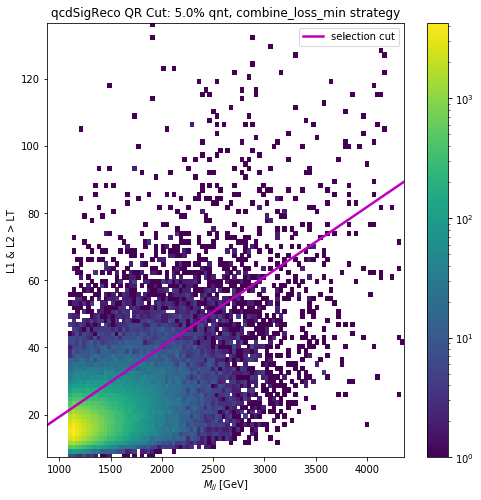

In [7]:
# plot mjj qcd sig to check for flat ratio
an.analyze_discriminator_cut(discriminator, qcd_sig_data['qcdSigReco'])

plot mjj accepted vs rejected signal to check for mass sculpting

do statistical analysis